# Multi-objetctive optimization problem - Genetic Algorithms

In [1]:
import timeit
import matplotlib.pyplot as plt

from ga_compounds import PRICE, ATOMIC_WEIGHT
from ga_compounds import population_cp
from ga_compounds import population_fitness_cp
from ga_compounds import population_element_mutation_cp, population_weight_mutation_cp 
from ga_compounds import population_pair_crossover_cp
from ga_compounds import tournament_selection_cp, roulette_selection_cp

## Problem 

The problem here is a multiple-objective optimization problem. We have two dictionaries giving information about the prices and weights of atoms. The objetctive is to form compounds of the form xAyBzC, where the upper case letters are elements, and the lower case ones are molar proportions. We have the constraints that $x+y+z=100$, and all of them must be greater or equal to 5. The objective is to obtain the compound with the lowest weight and highest price. The individuals were represented as a list with two lists: the first one containing the elements, and the second one containing the values $x$, $y$ and $z$.

The operators utilized were:
- Element mutation: mutates one or more elements from an individual. It contains a mutation rate, that determines whether the individual will be mutated or not, and an element mutation rate, that determines whether an element will be changed or not.

- Weight mutation: mutates two weights of the individual. We calculate the minimum distance $D$ from the weights to the boundaries of their possible values, in this case 5 and 90, and then choose a random value in the uniform distribution from $-D$ to $D$. We then add this value to one of the weights, and subtract from the other one, maintaining the initial conditions for the weights.

- Pair crossover: recombinates the elements and weights from two different solutions.

- Tournament selection: randomly selects a certain amount of individual in the population and chooses the best fitness among them.

- Roulette selection: each individual is selected with probability proportional to its fitness. 

The objective function defined had to contemplate both the maximization of the price and the minimization of the weight. This way, we choosed to maximize the following function:
\begin{equation}
f(X) = P(X) - W(X)
\end{equation}
Where $P(X)$ and $W(X)$ are the price and weights of individual $X$. Note that maximizing this function also includes minimizing the weight, because of the minus sign in front of it. These functions are calculated using the dictionaries `PRICE` and `ATOMIC_WEIGHT` with the weights and elements from the individuals. Note that we normalized the weights and prices by their maximum possible value, to certify that the absolute values of the two functions do not leed to a biased choice of individuals.

## Simulations

Defining the constants of the problem, which can be modified.

In [2]:
NUMBER_ELEMENTS = 3

GENERATIONS = 500
POPULATION_SIZE = 1000
INDIVIDUAL_MUTATION_RATE = 0.1
ELEMENT_MUTATION_RATE = 0.3
WEIGHT_MUTATION_RATE = 0.1
CROSSOVER_RATE = 0.5
NUMBER_INDIVIDUALS_TOURNAMENT = 15

Generating the keyword `KW` and the initial population, and applying the GA.

In [3]:
population = population_cp(POPULATION_SIZE, num_elements=NUMBER_ELEMENTS)
hof = []

start = timeit.default_timer()

for _ in range(GENERATIONS):
    #Fitness calculation and selection
    fitness = population_fitness_cp(population)
    #selected_population = tournament_selection_cp(population, fitness, NUMBER_INDIVIDUALS_TOURNAMENT)
    selected_population = roulette_selection_cp(population, fitness)
    
    #Crossover
    crossover_population = population_pair_crossover_cp(selected_population, CROSSOVER_RATE)
    
    #Element and weight mutation
    element_mutated_population = population_element_mutation_cp(crossover_population, 
                                                                individual_mutation_rate=INDIVIDUAL_MUTATION_RATE,
                                                                element_mutation_rate=ELEMENT_MUTATION_RATE)
    weight_mutated_population = population_weight_mutation_cp(element_mutated_population, 
                                                              WEIGHT_MUTATION_RATE)
    
    #HOF atualization
    fitness = population_fitness_cp(weight_mutated_population)
    best_fitness = max(fitness)
    index = fitness.index(best_fitness)
    best_individual = weight_mutated_population[index]
    hof.append(best_individual)
        
    #Restarting the population
    population = weight_mutated_population

end = timeit.default_timer()

Printing some information about our simulation.

In [4]:
fitness = population_fitness_cp(hof)
best_fitness = max(fitness)
index = fitness.index(best_fitness)
solution = hof[index]

elements, weights = solution[0], solution[1] 
weight, price = 0, 0

for i in range(len(elements)):
    weight += ATOMIC_WEIGHT[elements[i]] * weights[i]
    price += PRICE[elements[i]] * weights[i]

print(f'solution: {solution}')
print()
print(f'best_fitness={best_fitness:.3f}')
print()
print(f'price={price:.3f}, weight={weight:.3f}')
print()
print(f'runtime={(end - start):.3f}s')

solution: [['Po', 'Tc', 'Pu'], [90.0, 5.0, 5.00000000000004]]

best_fitness=0.149

price=4428032950000.000, weight=20519.536

runtime=9.341s


## Multiple Simulations

Now, we will run this algorithm multiple times and compare the best solutions obtained.

In [5]:
HOF = []

for _ in range(20):
    population = population_cp(POPULATION_SIZE, num_elements=NUMBER_ELEMENTS)
    hof = []

    for _ in range(GENERATIONS):
        #Fitness calculation and selection
        fitness = population_fitness_cp(population)
        #selected_population = tournament_selection_cp(population, fitness, NUMBER_INDIVIDUALS_TOURNAMENT)
        selected_population = roulette_selection_cp(population, fitness)

        #Crossover
        crossover_population = population_pair_crossover_cp(selected_population, CROSSOVER_RATE)

        #Element and weight mutation
        element_mutated_population = population_element_mutation_cp(crossover_population, 
                                                                    individual_mutation_rate=INDIVIDUAL_MUTATION_RATE,
                                                                    element_mutation_rate=ELEMENT_MUTATION_RATE)
        weight_mutated_population = population_weight_mutation_cp(element_mutated_population, 
                                                                  WEIGHT_MUTATION_RATE)

        #HOF atualization
        fitness = population_fitness_cp(weight_mutated_population)
        best_fitness = max(fitness)
        index = fitness.index(best_fitness)
        best_individual = weight_mutated_population[index]
        hof.append(best_individual)

        #Restarting the population
        population = weight_mutated_population
    
    #Finding the best solution from the iteration
    fitness = population_fitness_cp(hof)
    best_fitness = max(fitness)
    index = fitness.index(best_fitness)
    solution = hof[index]
    
    HOF.append(solution)

Calculating the weights and prices of the best solutions.

In [6]:
SOLUTION_PRICES = []
SOLUTION_WEIGHTS = []

for solution in HOF:
    elements, weights = solution[0], solution[1] 
    weight, price = 0, 0

    for i in range(len(elements)):
        weight += ATOMIC_WEIGHT[elements[i]] * weights[i]
        price += PRICE[elements[i]] * weights[i]
        
    SOLUTION_PRICES.append(price)
    SOLUTION_WEIGHTS.append(weight)

Ploting the data.

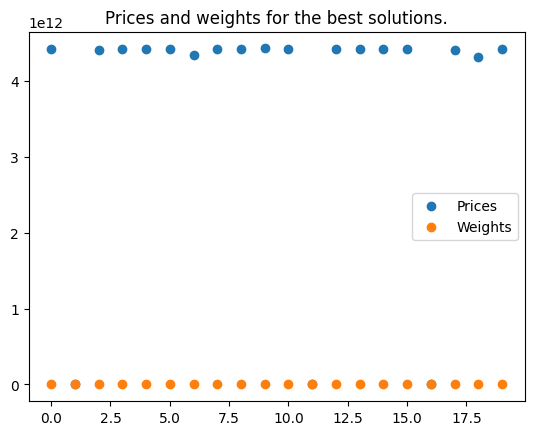

In [7]:
x = [i for i in range(len(SOLUTION_PRICES))]

plt.scatter(x, SOLUTION_PRICES, label='Prices')
plt.scatter(x, SOLUTION_WEIGHTS, label='Weights')
plt.title('Prices and weights for the best solutions.')
plt.legend()
plt.show()

In [8]:
fitness = population_fitness_cp(HOF)
best_fitness = max(fitness)
index = fitness.index(best_fitness)
solution = HOF[index]

elements, weights = solution[0], solution[1] 
weight, price = 0, 0

for i in range(len(elements)):
    weight += ATOMIC_WEIGHT[elements[i]] * weights[i]
    price += PRICE[elements[i]] * weights[i]

print(f'solution: {solution}')
print()
print(f'best_fitness={best_fitness:.3f}')
print()
print(f'price={price:.3f}, weight={weight:.3f}')

solution: [['Po', 'O', 'N'], [89.99689905312553, 5.003100940438446, 5.000000006436]]

best_fitness=0.212

price=4427847433415.247, weight=18959.432


Here we observe that the algorithm finds a way to include the most expensive element `Po` with the highest amount of weight it can possibly achieve, and then simply choose other lean elements. We also noticed that the convergence was much better using the roullete selection than using the tournament selection. 